# Download samples
## Imports

In [1]:
import sys
sys.path.append('/home/jovyan/work/workspace')

In [2]:
import os
import rasterio

from tjects.experiments.testbed18 import config
from api_coverages import get_coverage

%load_ext autoreload
%autoreload 2

## Configuration

In [3]:
collection = 's2'

bbox = [20.27, 66.46, 20.39, 66.55] # left part paper figure 8
#bbox = [20.39, 66.46, 20.49, 66.55] # right part paper figure 8

bands = None  # e.g.'blue, green, red'

out_file = config.data_folder + '/samples/' + collection \
           + '_{}_{}_{}_{}'.format(bbox[0], bbox[1], bbox[2], bbox[3]) + '.tif'
print('File will be saved to {}'.format(out_file))

File will be saved to /home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/samples/s2_20.27_66.46_20.39_66.55.tif


## Download data from API Coverages

In [4]:
collection_url = config.server_url + 'collections/' + collection
result = get_coverage(collection_url, bbox, bands)
dataset = rasterio.open(result)
#channel_names = dataset.descriptions
#images = dataset.read()

Requesting coverage from 'https://18.testbed.dev.52north.org/geodatacube/collections/s2/coverage?f=GeoTIFF&bbox=20.27,66.46,20.39,66.55'


## Plot data

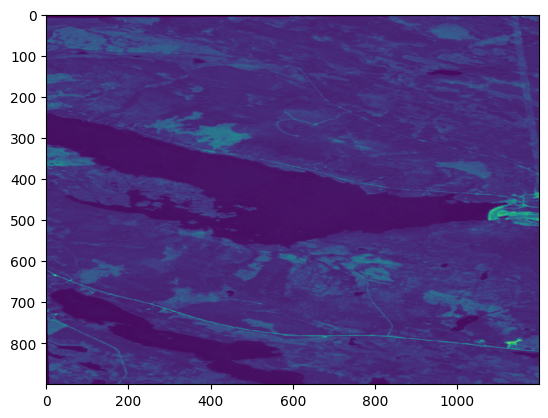

In [5]:
from matplotlib import pyplot
band_index = 1
pyplot.imshow(dataset.read(band_index))

## Save file

In [6]:
profile = dataset.profile

with rasterio.open(out_file, 'w', **profile) as dst:
    dst.write(dataset.read())